In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

survey = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# Making the year column a tad more interpretable
survey['year'] = np.where(survey['year'] == 6, 2012, 2014)

survey.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [13]:
survey[survey['idno'] ==133]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
29,CH,133.0,2012,7.0,8.0,5.0,5.0,8.0,5.0,3.0,2.0,54.0,1.0
802,CH,133.0,2014,4.0,6.0,6.0,7.0,7.0,7.0,2.0,1.0,63.0,1.0


### Question 1 - Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
Let's first see how this variable is distributed in general to see if we can use parametric tests.

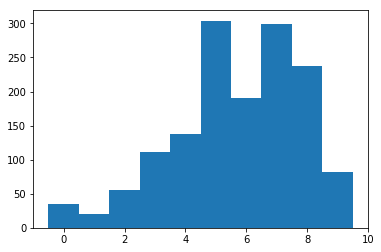

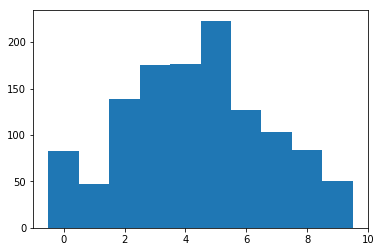

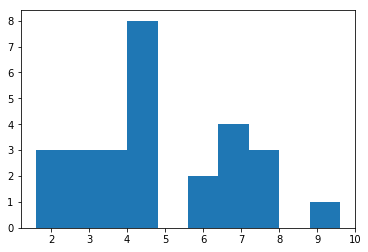

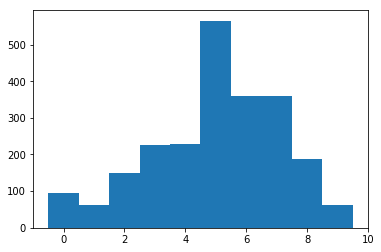

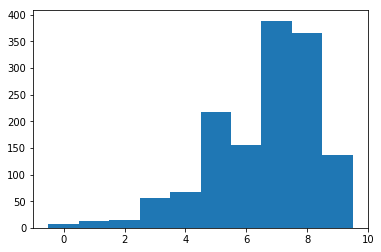

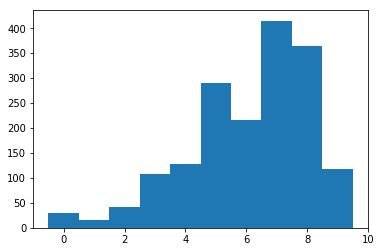

In [110]:
no_null = survey.dropna()

for country in no_null['cntry'].unique():
    plt.hist(no_null[no_null['cntry'] == country]['ppltrst'].values,align='left')
    plt.show()

While the distributions are not perfectly normal, they are close enough for it to be valid to use parametric tests to evaluate the research question at hand. When trying to answer this question for each country, we're dealing with paired samples -- those in each country when asked the question in 2012, and those same people when asked in 2014. Thus, it is appropriate to use the paired t-test from scipy. This also has the advantage of dealing with missing data we may have in one year but not the other.

In [65]:
for country in survey['cntry'].unique():
    print('{} Results:'.format(country))
    cntry = survey[survey['cntry'] == country]
    cntry_2012 = cntry[cntry['year'] == 2012]['ppltrst']
    cntry_2014 = cntry[cntry['year'] == 2014]['ppltrst']
    print(stats.ttest_rel(cntry_2012,cntry_2014,nan_policy='omit'))

CH Results:
Ttest_relResult(statistic=-0.65868517567257368, pvalue=0.51029435113011345)
CZ Results:
Ttest_relResult(statistic=-0.50016383368872164, pvalue=0.61712926824047398)
DE Results:
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.85685637970958051)
ES Results:
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)
NO Results:
Ttest_relResult(statistic=0.50730770811244041, pvalue=0.61209257015176999)
SE Results:
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.039007816709585447)


Only in two countries, Spain and Sweden, was there a statistically significant change in trust of others. Let's see what direction that occurred in.

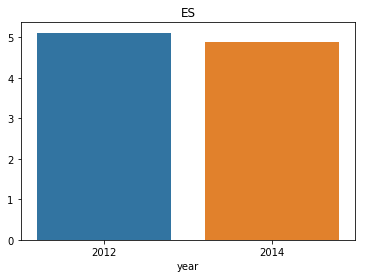

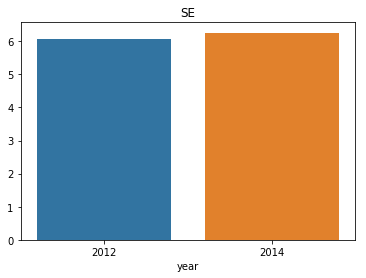

In [94]:
for country in ['ES','SE']:
    cntry = survey[survey['cntry'] == country]
    plt.figure()
    plt.title(country)
    sns.barplot(cntry.groupby('year').mean()['ppltrst'].index,cntry.groupby('year').mean()['ppltrst'].values)
    plt.show()

Spain's people trust went down, while Sweden's went up. Interesting!

### Question 2 - Did people become happier from 2012 to 2014? Compute results for each country in the sample.
Let's go about this in the same manner as the first question, by beginning with identifying whether the variables at hand are normal(ish).

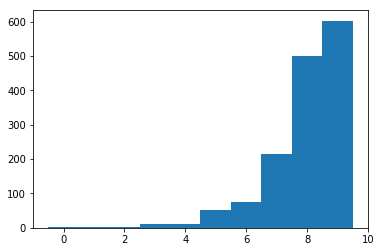

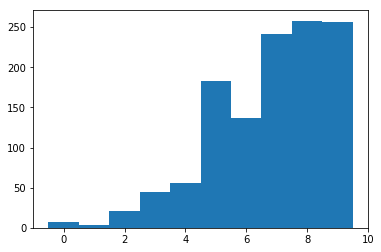

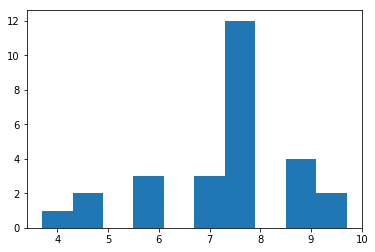

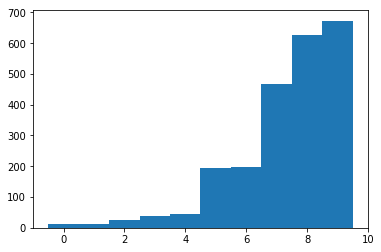

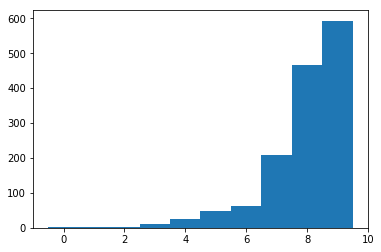

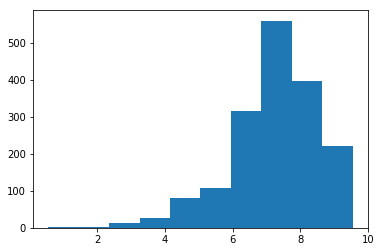

In [111]:
for country in no_null['cntry'].unique():
    plt.hist(no_null[no_null['cntry'] == country]['happy'].values,align='left')
    plt.show()

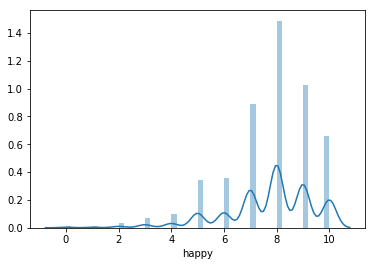

In [109]:
sns.distplot(no_null['happy'])
plt.show()

These are a little less well aligned on a country by country basis, but the variable overall still shows a pretty normal distribution. As such, I think it is valid to use the same method that we used for trust.

In [112]:
for country in survey['cntry'].unique():
    print('{} Results:'.format(country))
    cntry = survey[survey['cntry'] == country]
    cntry_2012 = cntry[cntry['year'] == 2012]['happy']
    cntry_2014 = cntry[cntry['year'] == 2014]['happy']
    print(stats.ttest_rel(cntry_2012,cntry_2014,nan_policy='omit'))

CH Results:
Ttest_relResult(statistic=-0.31941295786223201, pvalue=0.74950013554290629)
CZ Results:
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894509)
DE Results:
Ttest_relResult(statistic=-0.80622577482985491, pvalue=0.43461387077349911)
ES Results:
Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)
NO Results:
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)
SE Results:
Ttest_relResult(statistic=-0.55816370860300124, pvalue=0.57687095912337139)


In [114]:
survey[survey['cntry'] == 'NO'].groupby('year').mean()['happy']

year
2012    8.251719
2014    7.915185
Name: happy, dtype: float64

In [114]:
survey[survey['cntry'] == 'NO'].groupby('year').mean()['happy']

year
2012    8.251719
2014    7.915185
Name: happy, dtype: float64

Only in one country, Norway, does there seem to be a noticeable effect. In Norway, happiness has actually decreased. So I think it's pretty fair to say that happiness has not increased over this time period!

### Question 3 - Who reported watching more TV in 2012, men or women?
Let's first subset our df to the chosen year and see if the variable is normally distributed.

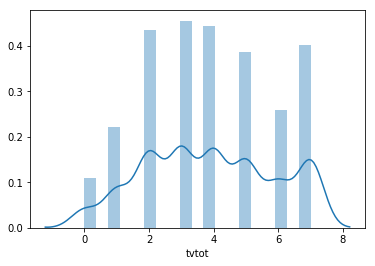

In [118]:
yr_2012 = survey[survey['year'] == 2012].dropna()
sns.distplot(yr_2012['tvtot'])
plt.show()

This doesn't look so normal. Let's just follow this up with a Shapiro-Wilk test to see just how non-normal this distribution is.

In [119]:
stats.shapiro(yr_2012['tvtot'])

(0.9427680969238281, 4.35002369366526e-37)

Since we have an exceptionally low p-value here, that means we can *reject* the null hypothesis that this is actually a normal distribution. In other words, we're correct in thinking it's not very normal and should use a non-parametric test to answer our research question. Let's use the Mann-Whitney test, which is ideal for comparing two samples.

In [124]:
men_2012 = yr_2012[yr_2012['gndr'] == 1].dropna()
women_2012 = yr_2012[yr_2012['gndr'] == 2].dropna()
len(men_2012)

2053

In [128]:
stats.mannwhitneyu(men_2012['tvtot'],women_2012['tvtot'])

MannwhitneyuResult(statistic=2042391.5, pvalue=0.21654019333228419)

We can't conclude that there is a statistically significant difference in TV watching between men and women in this year.

### Question 4 - Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Again, let's determine the normality of the distribution of the variable in question.

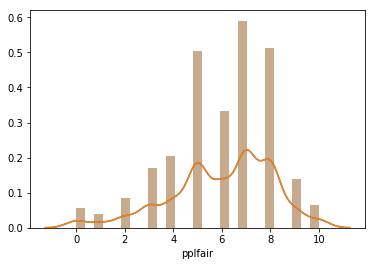

In [130]:
sns.distplot(yr_2012['pplfair'])
plt.show()

In [133]:
stats.shapiro(yr_2012['pplfair'])

(0.9461127519607544, 3.1786112692176124e-36)

Despite the pretty low p-value for the Shapiro test, this variable seems pretty normal. So let's try just using a simple t test.

In [134]:
alone_2012 = yr_2012[yr_2012['partner'] == 2]
partner_2012 = yr_2012[yr_2012['partner'] == 1]

In [135]:
stats.ttest_ind(alone_2012['pplfair'],partner_2012['pplfair'])

Ttest_indResult(statistic=-3.0430439318464235, pvalue=0.0023569366769392482)

In [138]:
print(alone_2012['pplfair'].mean())
print(partner_2012['pplfair'].mean())

5.86592544146501
6.0743509047993705


Finally, something statistically significant! Looks like people who have a partner scored higher for trusting others than those who were alone.

### Question 5 - Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Normality assessment first, as usual!

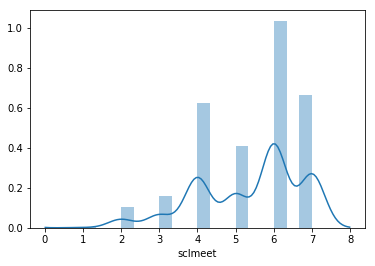

In [173]:
# Four countries: Sweden, Denmark, Scandinavia (Scandinavia battle!) 
subset = survey[(survey['cntry'].isin(['DE','NO','SE']))&(survey['year'] == 2014)]
subset = subset.dropna(subset=['sclmeet'])
subset_meet = subset['sclmeet']

sns.distplot(subset_meet)
plt.show()

Let's start with treating this as normal, though it is definitely borderline. Let's use a one-way ANOVA test to determine whether or not the groups are different at all, and see if this warrants further investigation.

In [174]:
NO = subset[subset['cntry'] == 'NO']
SE = subset[subset['cntry'] == 'SE']
DE = subset[subset['cntry'] == 'DE']
NO_meet = NO['sclmeet']
SE_meet = SE['sclmeet']
DE_meet = DE['sclmeet']

In [175]:
stats.f_oneway(NO_meet, SE_meet, DE_meet)

F_onewayResult(statistic=5.0262600453269908, pvalue=0.0066641633271129789)

There does seem to be a statistical difference between these groups. Let's just confirm this with a Kruskal-Wallis test, which is similar to an ANOVA but works in a non-parametric fashion. This is worthwhile since the original distribution is only debatably normal.

In [176]:
stats.kruskal(NO_meet, SE_meet, DE_meet)

KruskalResult(statistic=13.690159503963239, pvalue=0.0010646813228366533)

This again confirms that there's a difference between the groups. But which ones? Let's investigate with a Tukey's HSD (operating on the assumption that these distributions are normal-ish). 

In [156]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=subset['sclmeet'],      # Data
                          groups=subset['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
DE,NO,0.8738,0.0141,1.7334,True
DE,SE,0.9976,0.1396,1.8557,True
NO,SE,0.1239,-0.0344,0.2822,False


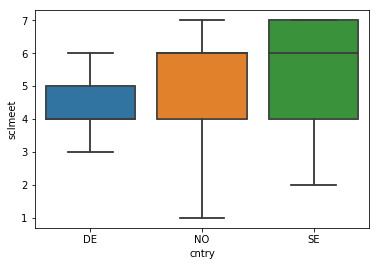

In [159]:
# Looking at meandiff more closely
sns.boxplot(subset['cntry'],subset['sclmeet'])
plt.show()

In [160]:
print(NO_meet.mean(),SE_meet.mean(),DE_meet.mean())

5.3023255813953485 5.426211453744493 4.428571428571429


Super interesting! Looks like Denmark differs from the other two countries, Sweden and Norway. Its respondents in 2014 reported fewer social interactions than those in Sweden or Denmark. There's not a significant difference between Norway and Sweden. Let's try Kruskal-Wallace just to confirm that this conclusion jives if we are to take a non-parametric approach (assuming we deem the original var to be non-normal in its distribution).

### Question 6 - Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Let's appoach this in the same framework as we did the prior question, but with three new countries

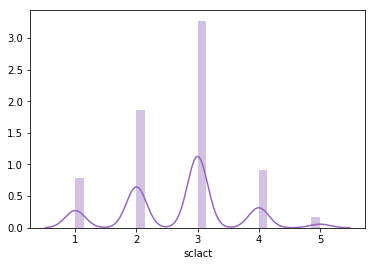

In [172]:
# Four countries: Sweden, Denmark, Scandinavia (Scandinavia battle!) 
subset2 = survey[(survey['cntry'].isin(['CH','CZ','ES']))&(survey['year'] == 2014)]
subset2 = subset2.dropna(subset=['sclact'])
subset2_act = subset2['sclact']

sns.distplot(subset2_act)
plt.show()

This is pretty straightforwardly normal. On to the ANOVA test.

In [182]:
CH = subset2[subset2['cntry'] == 'CH']
CZ = subset2[subset2['cntry'] == 'CZ']
ES = subset2[subset2['cntry'] == 'ES']
CH_act = CH['sclact']
CZ_act = CZ['sclact']
ES_act = ES['sclact']

In [183]:
stats.f_oneway(CH_act, CZ_act, ES_act)

F_onewayResult(statistic=7.6490889729985847, pvalue=0.00048729163650953859)

Again, there does seem to be a statistical difference between these groups. Let's now use the tukey analysis to see where the differences are occurring.

In [184]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=subset2['sclact'],      # Data
                          groups=subset2['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.0786,-0.1933,0.0361,False
CH,ES,-0.1648,-0.2645,-0.0651,True
CZ,ES,-0.0862,-0.1911,0.0187,False


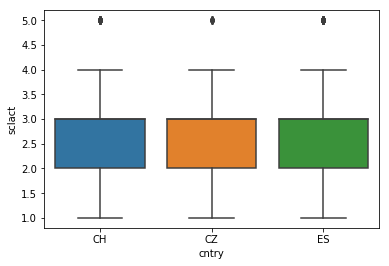

In [185]:
# Note, meandiff is absolute (always pos) - proof:
sns.boxplot(subset2['cntry'],subset2['sclact'])
plt.show()

In [186]:
print(CH_act.mean(),CZ_act.mean(),ES_act.mean())

2.7816993464052286 2.703076923076923 2.6168776371308016


Interesting, the only statistical difference seems to be between Switzerland and Spain. Swiss respondents seem to do more social activities in their age group than Spanish respondents.